In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Machine_Learning\ai_assistant_usage_student_life.csv") 
data.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [3]:
#Check the dataset shape (rows, columns).
data.shape
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns")

There are 10000 rows and 11 columns


In [4]:
#Display column names and their data types.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


In [5]:
#Check for duplicates
data.duplicated().sum()

np.int64(0)

In [6]:
#Check for missing values in each column.
print (data.isnull().sum())

SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64


In [7]:
#Show summary statistics for SessionLengthMin and TotalPrompts.
data[['SessionLengthMin', 'TotalPrompts']].describe(),

(       SessionLengthMin  TotalPrompts
 count      10000.000000  10000.000000
 mean          19.846467      5.607500
 std           13.897302      4.648764
 min            0.030000      1.000000
 25%            9.630000      2.000000
 50%           16.650000      4.000000
 75%           26.670000      8.000000
 max          110.810000     39.000000,)

In [8]:
#Find the number of unique values in StudentLevel, Discipline, and TaskType.
import numpy as np
print(f"Unique values in StudentLevel are {data['StudentLevel'].nunique()} and they include: {data['StudentLevel'].unique()}")
print(f"Unique values in Discipline are {data['Discipline'].nunique()} and they include: {data['Discipline'].unique()}" )
print(f"Unique values in TaskType {data['TaskType'].nunique()} and they include {data['TaskType'].unique()}" )

Unique values in StudentLevel are 3 and they include: ['Undergraduate' 'Graduate' 'High School']
Unique values in Discipline are 7 and they include: ['Computer Science' 'Psychology' 'Business' 'Biology' 'Math' 'History'
 'Engineering']
Unique values in TaskType 6 and they include ['Studying' 'Coding' 'Writing' 'Brainstorming' 'Homework Help' 'Research']


In [9]:
#Which TaskType is the most common?
print(data['TaskType'].mode())

0    Writing
Name: TaskType, dtype: object


In [10]:
#Calculate the average SessionLengthMin for each StudentLevel.
mean_session_length_by_student_level = data.groupby('StudentLevel')['SessionLengthMin'].mean()

print(f" The mean for session length mean is: {mean_session_length_by_student_level}")


 The mean for session length mean is: StudentLevel
Graduate         20.252236
High School      20.023740
Undergraduate    19.650943
Name: SessionLengthMin, dtype: float64


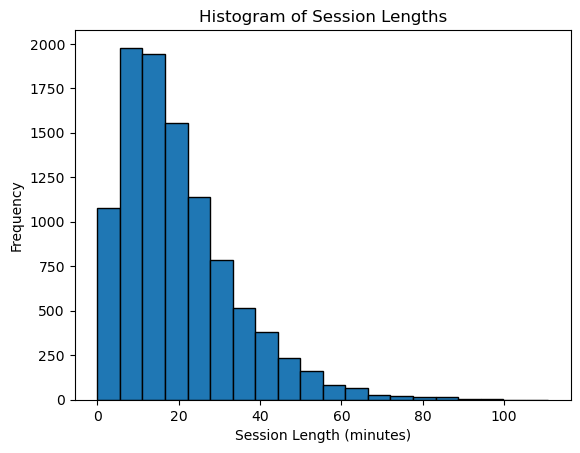

In [11]:
#Plot a histogram of SessionLengthMin.
x = data['SessionLengthMin']
plt.hist(x, bins=20, edgecolor='black')  # added bins and edgecolor for clarity
plt.xlabel("Session Length (minutes)")
plt.ylabel("Frequency")
plt.title("Histogram of Session Lengths")
plt.show()


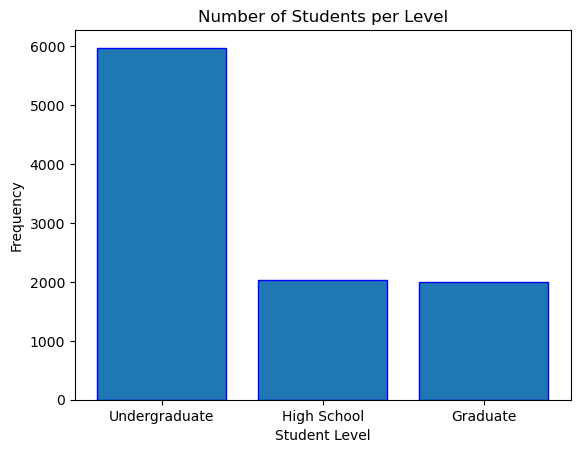

In [12]:
import matplotlib.pyplot as plt

# Count the number of sessions per StudentLevel
session_counts = data['StudentLevel'].value_counts()

# Plot bar chart
plt.bar(session_counts.index, session_counts.values, edgecolor='blue')
plt.xlabel("Student Level")
plt.ylabel("Frequency")
plt.title("Number of Students per Level")
plt.show()


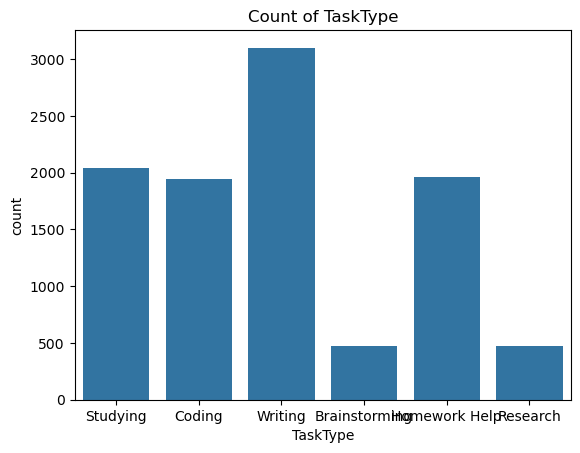

In [13]:
#Make a countplot of TaskType using Seaborn
data = data
sns.countplot(x = data['TaskType'], data = data)
plt.title("Count of TaskType")
plt.show()


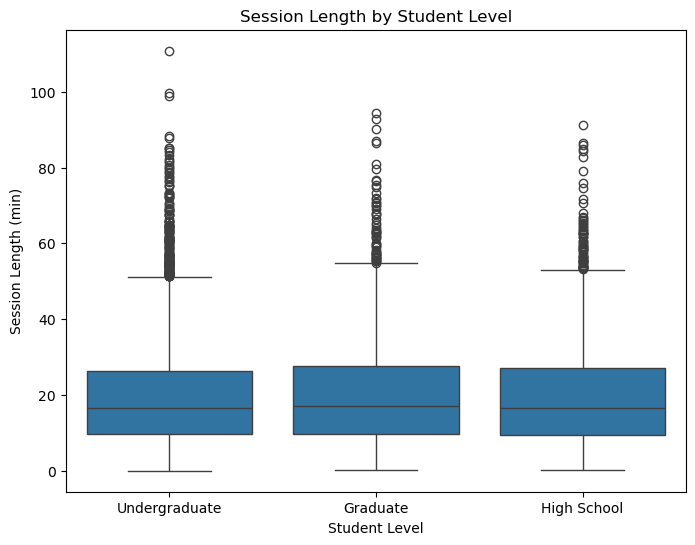

In [14]:
# Plot a boxplot of SessionLengthMin grouped by StudentLevel.
plt.figure(figsize=(8,6))
sns.boxplot(x='StudentLevel', y='SessionLengthMin', data=data)
plt.title('Session Length by Student Level')
plt.xlabel('Student Level')
plt.ylabel('Session Length (min)')
plt.show()


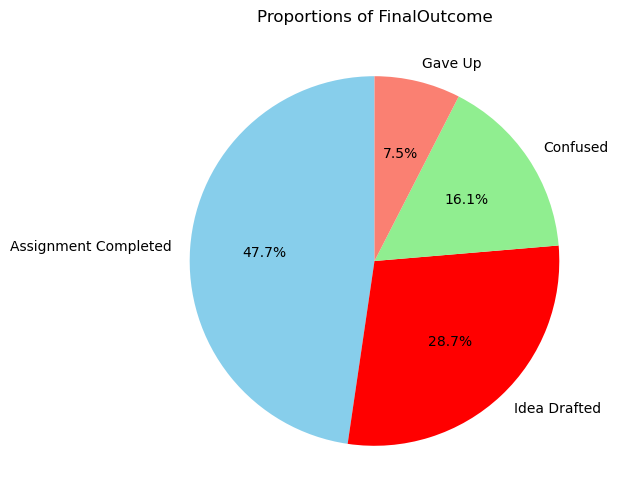

In [15]:
# Create a pie chart showing proportions of FinalOutcome.
outcome_counts = data['FinalOutcome'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'red', 'lightgreen', 'salmon'])
plt.title('Proportions of FinalOutcome')
plt.show()


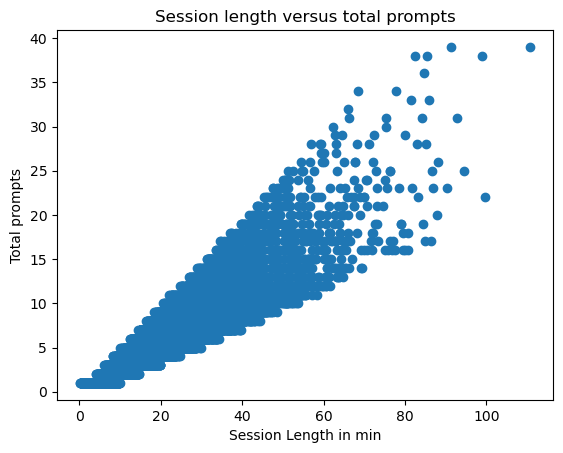

In [16]:
# Draw a scatterplot of SessionLengthMin vs. TotalPrompts.
x = data['SessionLengthMin']
y = data['TotalPrompts']

plt.scatter(x,y)
plt.xlabel('Session Length in min')
plt.ylabel('Total prompts')
plt.title('Session length versus total prompts')
plt.show()


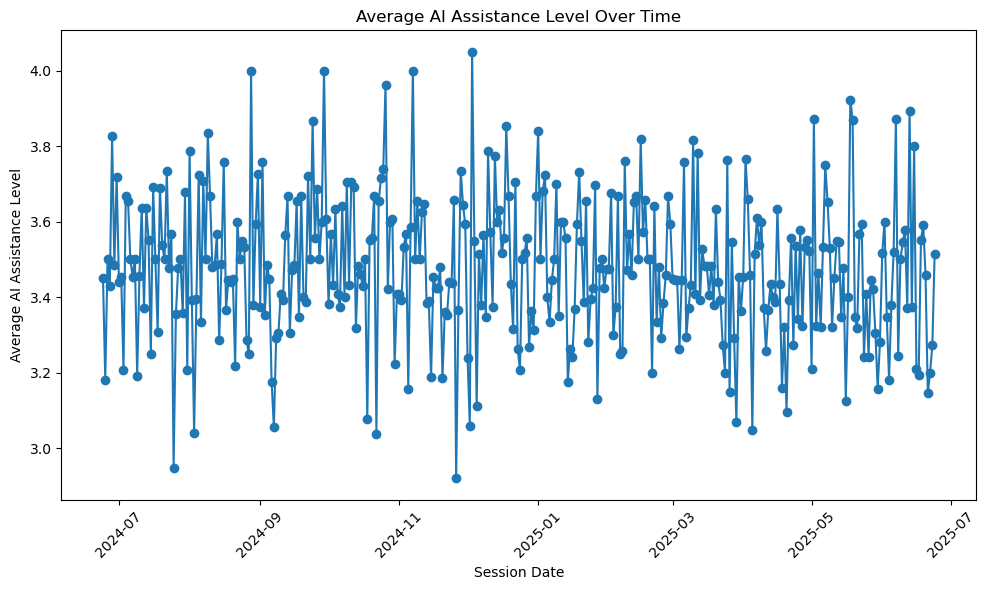

In [17]:
# Plot a line chart of average AI_AssistanceLevel over time (SessionDate).
data['SessionDate'] = pd.to_datetime(data['SessionDate'])
avg_ai_level = data.groupby('SessionDate')['AI_AssistanceLevel'].mean().reset_index()
plt.figure(figsize=(10,6))
plt.plot(avg_ai_level['SessionDate'], avg_ai_level['AI_AssistanceLevel'], marker='o')
plt.xlabel('Session Date')
plt.ylabel('Average AI Assistance Level')
plt.title('Average AI Assistance Level Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
#Find the average SessionLengthMin for each TaskType
Avg_SessionLength_per_Tasktype = data.groupby('TaskType')['SessionLengthMin'].mean()
print(Avg_SessionLength_per_Tasktype)

TaskType
Brainstorming    21.964223
Coding           19.467659
Homework Help    19.940536
Research         20.410000
Studying         19.705917
Writing          19.705888
Name: SessionLengthMin, dtype: float64


In [19]:
# Which Discipline had the most sessions?
Discipline_Most_Sessions = data['Discipline'].mode()[0]
print(Discipline_Most_Sessions)

Biology


In [20]:
# Compare average AI_AssistanceLevel across StudentLevel.
Avg_Assistant_Level_per_StudentLevel = data.groupby('StudentLevel')['AI_AssistanceLevel'].mean()
print(Avg_Assistant_Level_per_StudentLevel)

StudentLevel
Graduate         3.469674
High School      3.477060
Undergraduate    3.483607
Name: AI_AssistanceLevel, dtype: float64


In [21]:
#Find the most common FinalOutcome for Graduate students
grad_std = data[data['StudentLevel'] == "Graduate"]

Most_Common_Outcome = grad_std['FinalOutcome'].mode()[0]
print("Most common outcome for Graduate students:", Most_Common_Outcome)


Most common outcome for Graduate students: Assignment Completed


In [22]:
# Calculate the median SessionLengthMin for each FinalOutcome
median_session_for_each_FinalOutcome = data.groupby('FinalOutcome')['SessionLengthMin'].median()
print(median_session_for_each_FinalOutcome)

FinalOutcome
Assignment Completed    16.570
Confused                16.040
Gave Up                 17.290
Idea Drafted            17.085
Name: SessionLengthMin, dtype: float64


In [23]:
#Convert SessionDate into Year, Month, and Day columns
import pandas as pd
data['SessionDate'] = pd.to_datetime(data['SessionDate'])

data['Year'] = data['SessionDate'].dt.year
data['Month'] = data['SessionDate'].dt.month
data['Day'] = data['SessionDate'].dt.day

print(data[['SessionDate', 'Year', 'Month', 'Day']].head())



  SessionDate  Year  Month  Day
0  2024-11-03  2024     11    3
1  2024-08-25  2024      8   25
2  2025-01-12  2025      1   12
3  2025-05-06  2025      5    6
4  2025-03-18  2025      3   18


In [24]:
#Encode StudentLevel using Label Encoding.
le = LabelEncoder()
data['StudentLevel_encoded']=le.fit_transform(data['StudentLevel'])
data.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Year,Month,Day,StudentLevel_encoded
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,2024,11,3,2
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0,2024,8,25,2
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3,2025,1,12,2
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5,2025,5,6,2
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9,2025,3,18,2


In [25]:
#Apply One-Hot Encoding to TaskType.
ohe = OneHotEncoder(sparse_output=False)

tasktype_encoded = ohe.fit_transform(data[['TaskType']])
tasktype_df = pd.DataFrame(tasktype_encoded, columns=ohe.get_feature_names_out(['TaskType']))
data = pd.concat([data, tasktype_df], axis=1)
data.head()




,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,...,Year,Month,Day,StudentLevel_encoded,TaskType_Brainstorming,TaskType_Coding,TaskType_Homework Help,TaskType_Research,TaskType_Studying,TaskType_Writing
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,...,2024,11,3,2,0.0,0.0,0.0,0.0,1.0,0.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,...,2024,8,25,2,0.0,0.0,0.0,0.0,1.0,0.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,...,2025,1,12,2,0.0,1.0,0.0,0.0,0.0,0.0
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,...,2025,5,6,2,0.0,1.0,0.0,0.0,0.0,0.0
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,...,2025,3,18,2,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
#Create a new feature: PromptsPerMinute = TotalPrompts / SessionLengthMin.
data['PromptsPerMinute'] = data['TotalPrompts']/data['SessionLengthMin']
data.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,...,Month,Day,StudentLevel_encoded,TaskType_Brainstorming,TaskType_Coding,TaskType_Homework Help,TaskType_Research,TaskType_Studying,TaskType_Writing,PromptsPerMinute
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,...,11,3,2,0.0,0.0,0.0,0.0,1.0,0.0,0.352564
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,...,8,25,2,0.0,0.0,0.0,0.0,1.0,0.0,0.458365
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,...,1,12,2,0.0,1.0,0.0,0.0,0.0,0.0,0.260146
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,...,5,6,2,0.0,1.0,0.0,0.0,0.0,0.0,0.270270
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,...,3,18,2,0.0,0.0,0.0,0.0,0.0,1.0,0.320057


In [27]:
#Bin SessionLengthMin into categories: Short, Medium, Long.
data['SessionLengthCategory'] = pd.cut(data['SessionLengthMin'], bins=3, labels=['Short', 'Medium', 'Long'])

data[['SessionLengthMin', 'SessionLengthCategory']].head(10)


,SessionLengthMin,SessionLengthCategory
0,31.20,Short
1,13.09,Short
2,19.22,Short
3,3.70,Short
4,28.12,Short
5,7.54,Short
6,14.60,Short
7,9.20,Short
8,8.15,Short
9,5.57,Short


In [28]:
#Predict FinalOutcome using a Decision Tree Classifier
le = LabelEncoder()
data['Discipline_encoded'] = le.fit_transform(data['Discipline'])
data['FinalOutcome_encoded'] = le.fit_transform(data['FinalOutcome'])
data['UsedAgain_encoded'] = le.fit_transform(data['UsedAgain'])
data['TaskType_encoded'] = le.fit_transform(data['TaskType'])

dummy_table = data.select_dtypes(include=['int64', 'float64'])

X = dummy_table.drop(columns=['FinalOutcome_encoded'])
y = dummy_table['FinalOutcome_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.486

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.88      0.64       930
           1       0.45      0.19      0.27       349
           2       0.21      0.04      0.06       170
           3       0.38      0.14      0.20       551

    accuracy                           0.49      2000
   macro avg       0.39      0.31      0.29      2000
weighted avg       0.44      0.49      0.41      2000



In [29]:
#Predict UsedAgain using Logistic Regression
from sklearn.linear_model import LogisticRegression
X = dummy_table.drop(columns=['UsedAgain_encoded'])
y = dummy_table['UsedAgain_encoded']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.6925

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       615
           1       0.69      1.00      0.82      1385

    accuracy                           0.69      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.48      0.69      0.57      2000



c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
#Train a Random Forest Classifier to predict FinalOutcome.
X = dummy_table.drop(columns=['FinalOutcome_encoded'])
y = dummy_table['FinalOutcome_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf = RandomForestClassifier(
    n_estimators=50,     
    max_depth=None,       
    random_state=42
)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred = rf_clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4595

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.72      0.61       930
           1       0.36      0.26      0.30       349
           2       0.15      0.04      0.06       170
           3       0.36      0.28      0.32       551

    accuracy                           0.46      2000
   macro avg       0.35      0.32      0.32      2000
weighted avg       0.42      0.46      0.43      2000



In [31]:
#Use KNN (K-Nearest Neighbors) to classify UsedAgain.
X = dummy_table.drop(columns=['UsedAgain_encoded'])
y = dummy_table['UsedAgain_encoded']  # already 0/1 encoded

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.68

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.25      0.33       615
           1       0.72      0.87      0.79      1385

    accuracy                           0.68      2000
   macro avg       0.59      0.56      0.56      2000
weighted avg       0.64      0.68      0.65      2000



In [32]:
#Train a Naive Bayes Classifier to predict FinalOutcome.
X = dummy_table.drop(columns=['FinalOutcome_encoded'])
y = dummy_table['FinalOutcome_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

y_pred = nb_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.474

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.84      0.64       930
           1       0.35      0.29      0.32       349
           2       0.17      0.05      0.07       170
           3       0.40      0.11      0.17       551

    accuracy                           0.47      2000
   macro avg       0.36      0.32      0.30      2000
weighted avg       0.42      0.47      0.40      2000



In [33]:
#Build a Gradient Boosting Classifier for UsedAgain.
X = dummy_table.drop(columns=['UsedAgain_encoded'])
y = dummy_table['UsedAgain_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_clf = GradientBoostingClassifier(
    n_estimators=100,  
    learning_rate=0.1, 
    max_depth=3,       
    random_state=42
)
gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7375

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.46      0.52       615
           1       0.78      0.86      0.82      1385

    accuracy                           0.74      2000
   macro avg       0.69      0.66      0.67      2000
weighted avg       0.72      0.74      0.73      2000



In [34]:
#Apply an XGBoost Classifier to predict FinalOutcome.
X = dummy_table.drop(columns=['FinalOutcome_encoded'])
y = dummy_table['FinalOutcome_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_clf = xgb.XGBClassifier(
    n_estimators=100, 
    max_depth=5, 
    learning_rate=0.1, 
    objective='multi:softmax',  
    eval_metric='mlogloss',
    random_state=42
)

xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4735

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.80      0.62       930
           1       0.37      0.28      0.32       349
           2       0.50      0.04      0.08       170
           3       0.37      0.17      0.24       551

    accuracy                           0.47      2000
   macro avg       0.44      0.32      0.31      2000
weighted avg       0.45      0.47      0.42      2000



In [35]:
#Split the dataset into 80% training and 20% testing sets.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
#Evaluate one model using accuracy and a confusion matrix.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)




Accuracy: 0.4735
Confusion Matrix:
 [[746  83   2  99]
 [203  98   4  44]
 [100  43   7  20]
 [412  42   1  96]]


In [37]:
#Generate a classification report (precision, recall, f1-score).
from sklearn.metrics import classification_report
y_pred = xgb_clf.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.51      0.80      0.62       930
           1       0.37      0.28      0.32       349
           2       0.50      0.04      0.08       170
           3       0.37      0.17      0.24       551

    accuracy                           0.47      2000
   macro avg       0.44      0.32      0.31      2000
weighted avg       0.45      0.47      0.42      2000



In [38]:
from sklearn.model_selection import cross_val_score

# Features and target
X = dummy_table.drop(columns=['UsedAgain_encoded'])
y = dummy_table['UsedAgain_encoded']

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Perform 5-fold cross-validation using accuracy
cv_scores = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.7065 0.7065 0.7065 0.7065 0.706 ]
Mean CV Accuracy: 0.7064


In [39]:
#Use GridSearchCV to tune hyperparameters of a Decision Tree.
X = dummy_table.drop(columns=['UsedAgain_encoded'])
y = dummy_table['UsedAgain_encoded']

dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X, y)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.7522


In [48]:
#Use GridSearchCV to tune hyperparameters of a Random Forest.
# Features and target
X = dummy_table.drop(columns=['FinalOutcome_encoded'])  
y = dummy_table['FinalOutcome_encoded']

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],   # number of trees
    'max_depth': [None, 5, 10, 20]    # tree depth
}

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearch
grid_search.fit(X, y)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Best model
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.4979


In [ ]:
# Compare Logistic Regression, Decision Tree, Random Forest, Naive Bayes, KNN, Gradient Boosting, and XGBoost for predicting UsedAgain.
X = dummy_table.drop(columns=['UsedAgain_encoded'])
y = dummy_table['UsedAgain_encoded']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    results.append([name, acc, f1])

# Convert results to DataFrame for easy viewing
import pandas as pd
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score"])
print(results_df)

# Gradient Boosting has the highest accuracy of 0.735 and F1 score of 0.727 among all models which indicates it is a better model for predicting UsedAgain. It had the highest performance in terms of both accuracy and F1 score.

                 Model  Accuracy  F1 Score
0  Logistic Regression    0.6925  0.566684
1        Decision Tree    0.6405  0.641993
2        Random Forest    0.7250  0.699106
3          Naive Bayes    0.6670  0.579098
4                  KNN    0.6795  0.643647
5    Gradient Boosting    0.7375  0.727418
6              XGBoost    0.7235  0.706082


c:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [07:24:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
